In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
leagues = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/leagues.csv')
players = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/players.csv', encoding='latin1')
games = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/games.csv')
appearances = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/appearances.csv')
shots = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/shots.csv')
team = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/teams.csv')
team_stats = pd.read_csv(f'/content/drive/MyDrive/Proyecto Final/data/kaggle/teamstats.csv')

df = pd.read_csv(r'/content/drive/MyDrive/Proyecto Final/data/football_statistics_pl.csv')
pl = pd.read_csv(r'/content/drive/MyDrive/Proyecto Final/data/pl.csv')

In [ ]:
df

,season,date,HT,AT,result,H_power,A_power,H_points,A_points,HT_L5GW,HT_L5GL,HT_L5GD,AT_L5GW,AT_L5GL,AT_L5GD,HT_G,HT_GC,AT_G,AT_GC,HT_XG,AW_XG,HT_S,HT_SOT,AT_S,AT_SOT,HT_PPDA,AT_PPDA,HT_C,AT_C,HT_Y,AT_Y,HT_R,AT_R,ELO_HT,ELO_AT
0,2015,2015-08-08 15:45:00,Manchester United,Tottenham,1,81,79,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.627539,0.674600,0,0,0,0,0.00000,0.00000,0,0,0.0,0.0,0,0,1808.000000,1728.000000
1,2015,2015-08-08 18:00:00,Bournemouth,Aston Villa,2,73,75,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.876106,0.782253,0,0,0,0,0.00000,0.00000,0,0,0.0,0.0,0,0,1592.000000,1576.000000
2,2015,2015-08-08 18:00:00,Everton,Watford,0,78,75,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.604226,0.557892,0,0,0,0,0.00000,0.00000,0,0,0.0,0.0,0,0,1704.000000,1572.000000
3,2015,2015-08-08 18:00:00,Leicester,Sunderland,1,76,75,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.568030,1.459460,0,0,0,0,0.00000,0.00000,0,0,0.0,0.0,0,0,1631.000000,1603.000000
4,2015,2015-08-08 18:00:00,Norwich,Crystal Palace,2,74,76,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.130760,2.109750,0,0,0,0,0.00000,0.00000,0,0,0.0,0.0,0,0,1613.000000,1645.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2020,2021-05-23 15:00:00,Liverpool,Crystal Palace,1,85,76,66,44,4,0,1,2,3,0,66.0,42.0,41.0,64.0,2.203480,0.772317,99,32,69,28,8.96522,15.35568,38,28,2.0,9.0,0,0,1847.882417,1653.935612
2276,2020,2021-05-23 15:00:00,Manchester City,Everton,1,85,79,83,59,3,2,0,3,2,0,78.0,32.0,47.0,43.0,2.883550,1.072580,76,27,63,17,12.09556,14.42834,25,30,8.0,5.0,1,0,1904.418487,1727.949780
2277,2020,2021-05-23 15:00:00,Sheffield United,Burnley,1,73,76,20,39,2,3,0,2,3,0,19.0,63.0,33.0,54.0,0.420006,0.558508,43,8,62,23,16.75322,12.06928,19,26,10.0,5.0,0,0,1551.704831,1649.780311
2278,2020,2021-05-23 15:00:00,West Ham,Southampton,1,78,76,62,43,2,2,1,1,3,1,59.0,47.0,47.0,65.0,1.983440,1.351790,78,18,57,25,11.48794,16.06946,24,19,6.0,2.0,1,1,1736.485174,1632.771263


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    2280 non-null   int64  
 1   date      2280 non-null   object 
 2   HT        2280 non-null   object 
 3   AT        2280 non-null   object 
 4   result    2280 non-null   int64  
 5   H_power   2280 non-null   int64  
 6   A_power   2280 non-null   int64  
 7   H_points  2280 non-null   int64  
 8   A_points  2280 non-null   int64  
 9   HT_L5GW   2280 non-null   int64  
 10  HT_L5GL   2280 non-null   int64  
 11  HT_L5GD   2280 non-null   int64  
 12  AT_L5GW   2280 non-null   int64  
 13  AT_L5GL   2280 non-null   int64  
 14  AT_L5GD   2280 non-null   int64  
 15  HT_G      2280 non-null   float64
 16  HT_GC     2280 non-null   float64
 17  AT_G      2280 non-null   float64
 18  AT_GC     2280 non-null   float64
 19  HT_XG     2280 non-null   float64
 20  AW_XG     2280 non-null   floa

In [ ]:
df.describe()

,season,result,H_power,A_power,H_points,A_points,HT_L5GW,HT_L5GL,HT_L5GD,AT_L5GW,AT_L5GL,AT_L5GD,HT_G,HT_GC,AT_G,AT_GC,HT_XG,AW_XG,HT_S,HT_SOT,AT_S,AT_SOT,HT_PPDA,AT_PPDA,HT_C,AT_C,HT_Y,AT_Y,HT_R,AT_R,ELO_HT,ELO_AT
count,2280.0000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,2017.5000,1.085088,78.133333,78.133333,25.434211,25.605702,1.720175,1.793421,1.091667,1.792544,1.716667,1.096053,25.284649,25.411404,25.384649,25.251316,1.489263,1.214386,56.842105,19.501754,57.904825,19.879386,12.045715,11.881195,23.788158,24.325877,7.460526,7.390789,0.286404,0.283333,1695.415144,1697.058223
std,1.7082,0.740448,3.168063,3.168063,18.504487,18.547811,1.249392,1.271709,0.950703,1.258734,1.226976,0.934438,17.988152,16.862426,18.042508,16.739165,0.887733,0.778735,20.493700,8.275266,20.672294,8.452895,4.840987,4.870679,9.294241,9.460313,3.280539,3.300565,0.539765,0.540978,105.536915,105.491622
min,2015.0000,0.000000,73.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1447.816121,1449.526045
25%,2016.0000,1.000000,76.000000,76.000000,11.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,11.000000,12.000000,11.000000,11.000000,0.805090,0.619341,47.000000,14.000000,47.000000,15.000000,9.129795,8.976855,19.000000,19.000000,5.000000,5.000000,0.000000,0.000000,1622.025508,1624.077432
50%,2017.5000,1.000000,77.000000,77.000000,23.000000,23.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,23.000000,24.000000,23.000000,24.000000,1.321760,1.080935,57.000000,19.000000,58.000000,20.000000,11.316750,11.179755,24.000000,24.000000,8.000000,7.000000,0.000000,0.000000,1670.700867,1671.878104
75%,2019.0000,2.000000,81.000000,81.000000,37.000000,37.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,36.000000,37.000000,36.000000,37.000000,2.027967,1.648960,70.000000,25.000000,71.000000,25.000000,14.497990,14.224545,29.000000,30.250000,10.000000,10.000000,0.000000,0.000000,1765.099927,1767.254762
max,2020.0000,2.000000,85.000000,85.000000,96.000000,97.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,105.000000,77.000000,105.000000,76.000000,6.630490,5.517670,123.000000,48.000000,119.000000,51.000000,47.017450,67.333300,60.000000,61.000000,19.000000,19.000000,3.000000,3.000000,2041.791579,2044.193430


In [ ]:
team_stats.head()

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [ ]:
df.columns[4:]

Index(['result', 'H_power', 'A_power', 'H_points', 'A_points', 'HT_L5GW',
       'HT_L5GL', 'HT_L5GD', 'AT_L5GW', 'AT_L5GL', 'AT_L5GD', 'HT_G', 'HT_GC',
       'AT_G', 'AT_GC', 'HT_XG', 'AW_XG', 'HT_S', 'HT_SOT', 'AT_S', 'AT_SOT',
       'HT_PPDA', 'AT_PPDA', 'HT_C', 'AT_C', 'HT_Y', 'AT_Y', 'HT_R', 'AT_R',
       'ELO_HT', 'ELO_AT'],
      dtype='object')

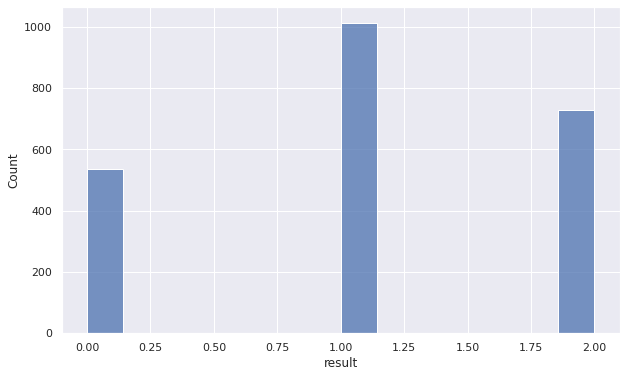

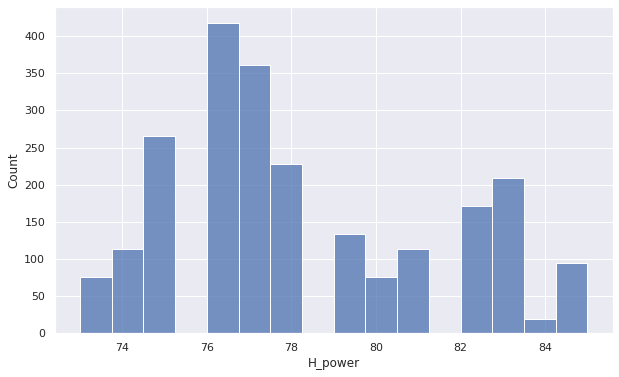

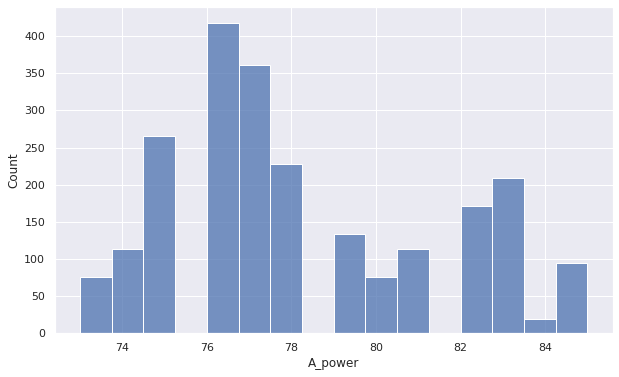

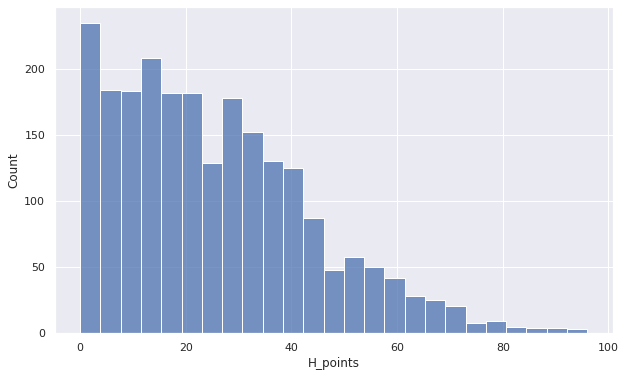

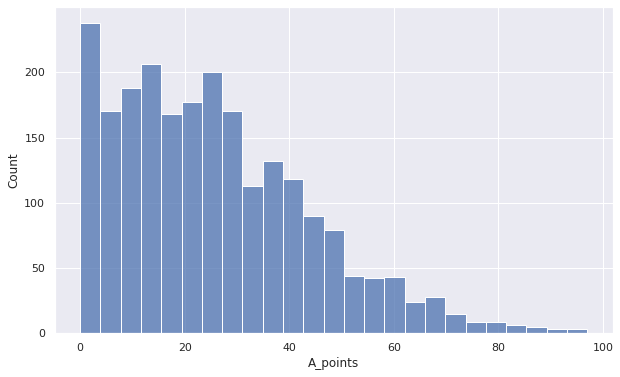

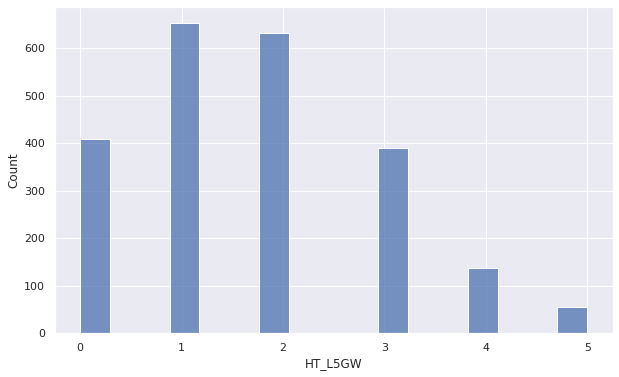

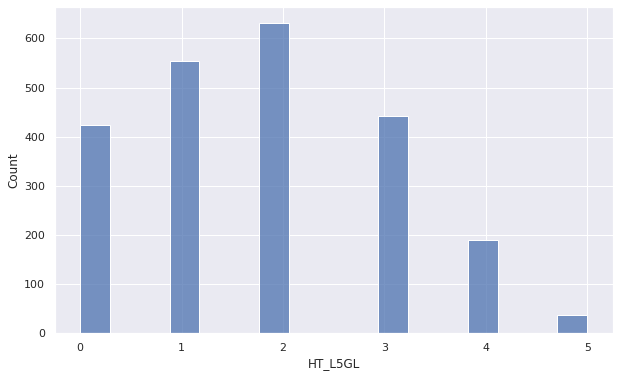

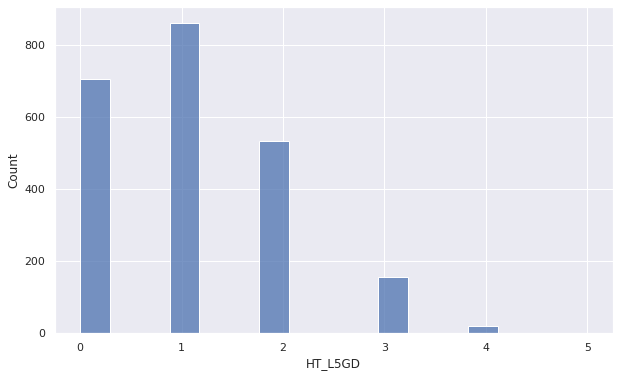

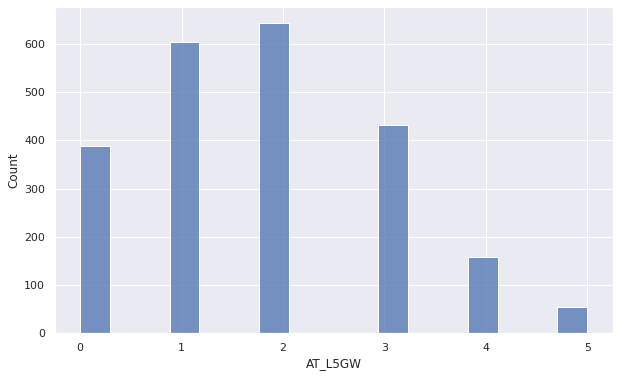

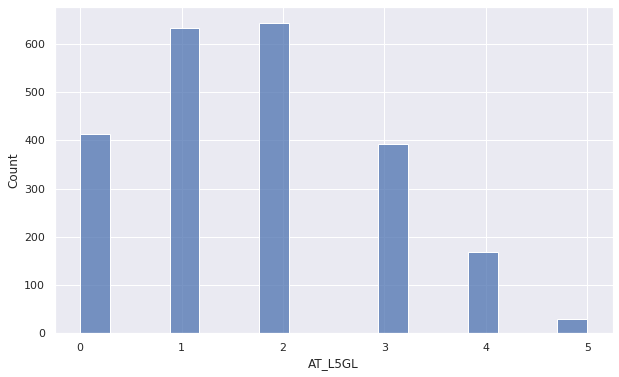

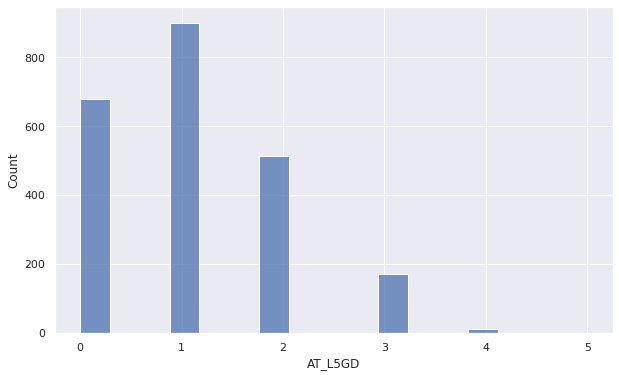

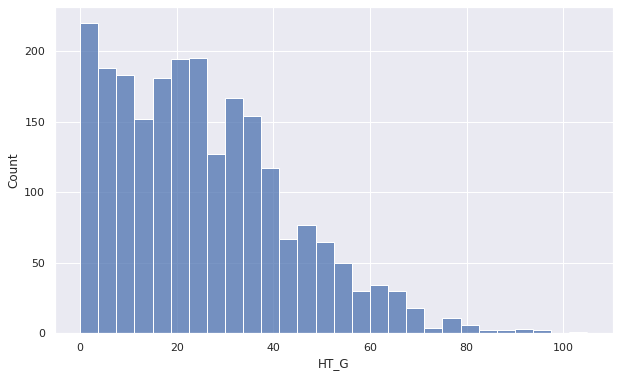

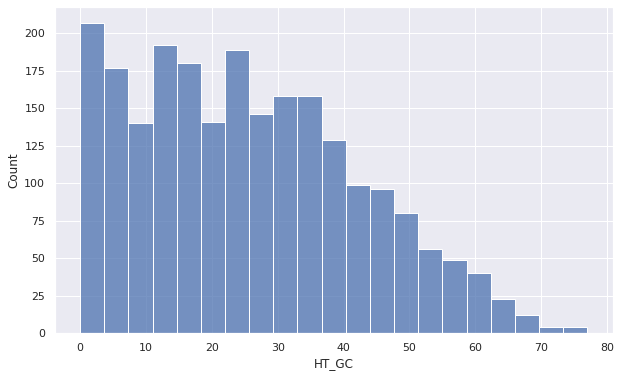

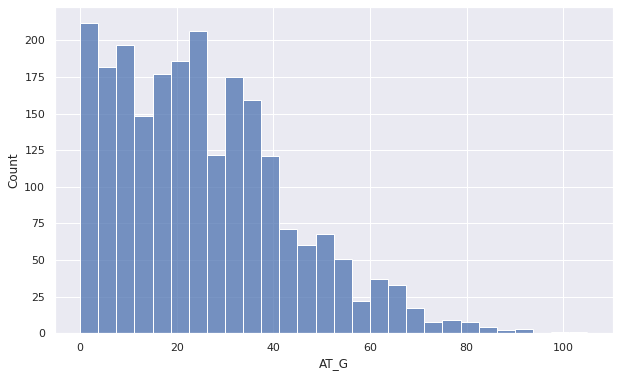

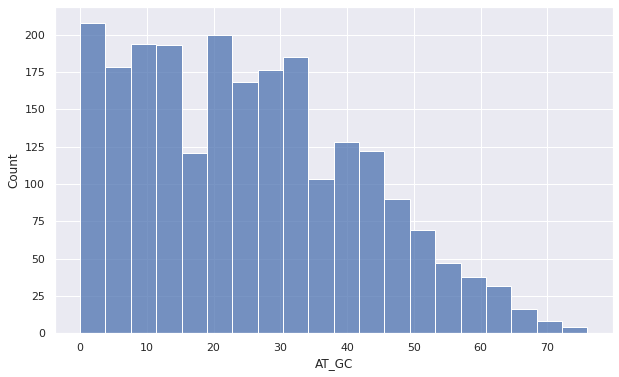

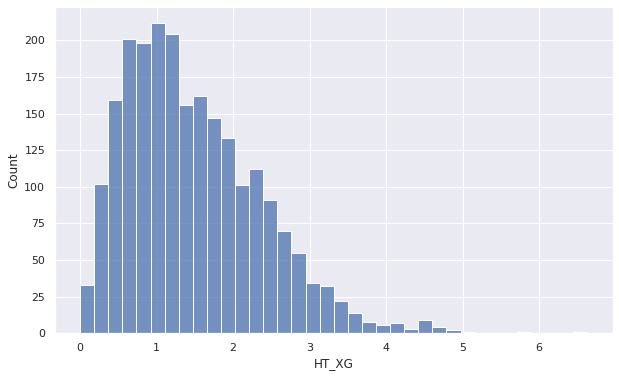

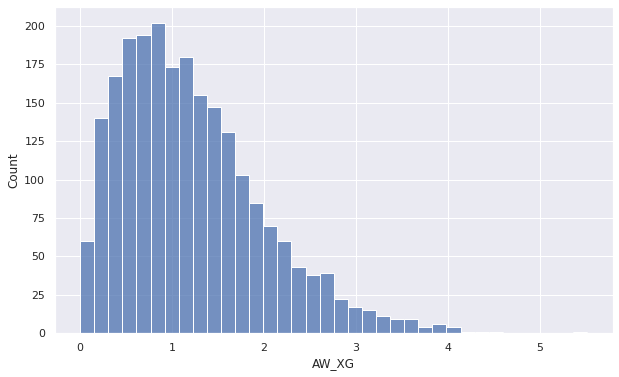

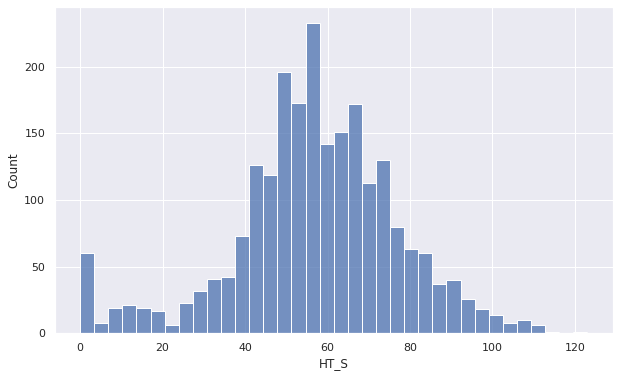

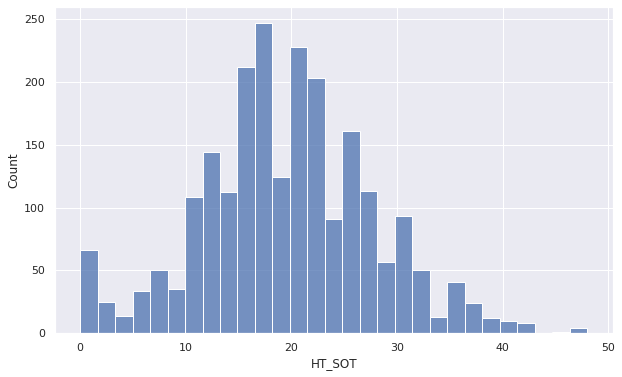

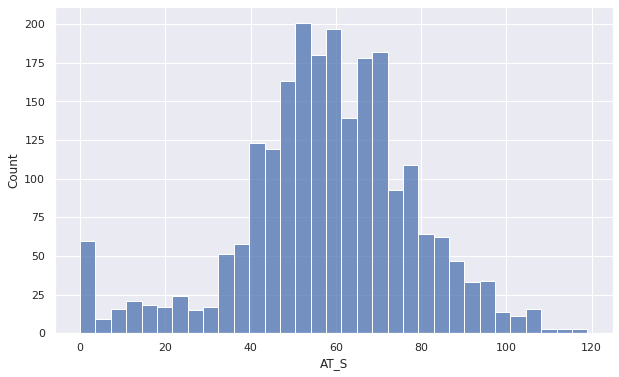

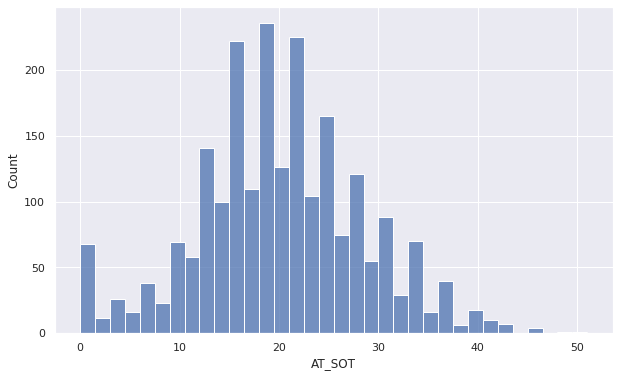

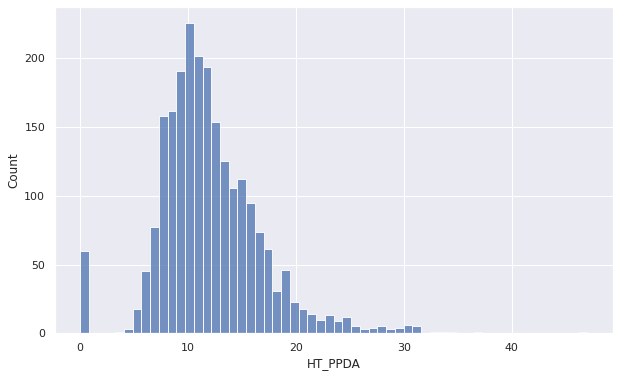

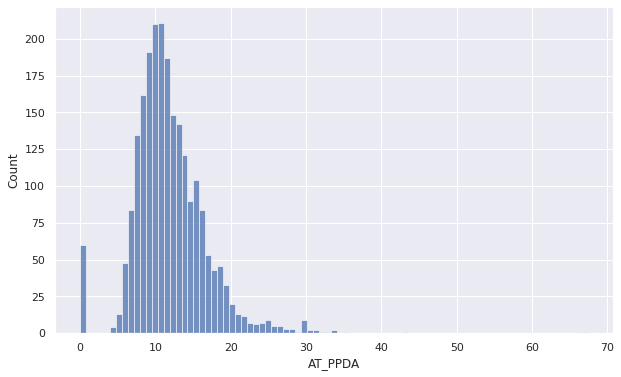

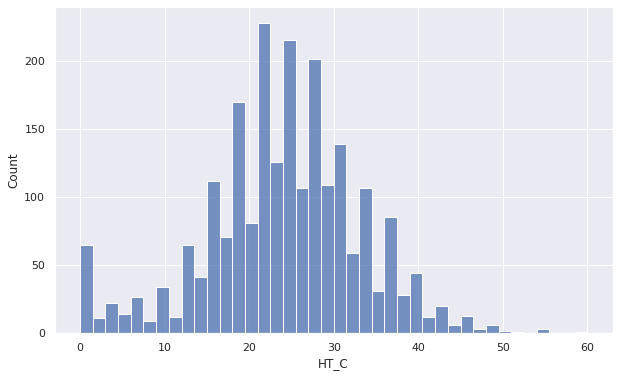

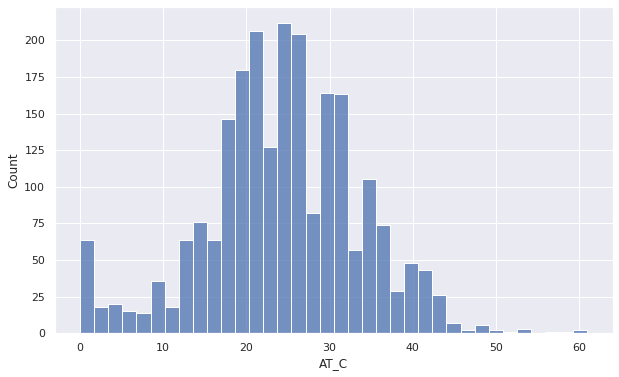

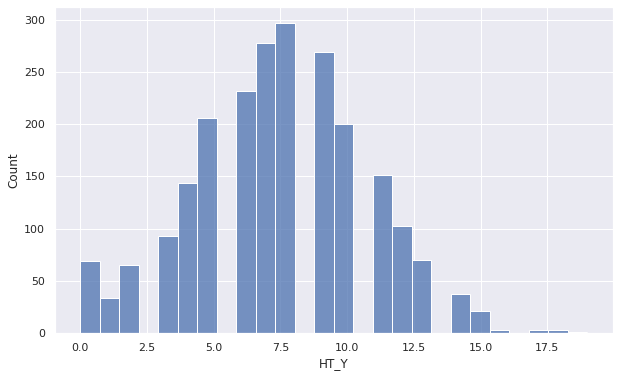

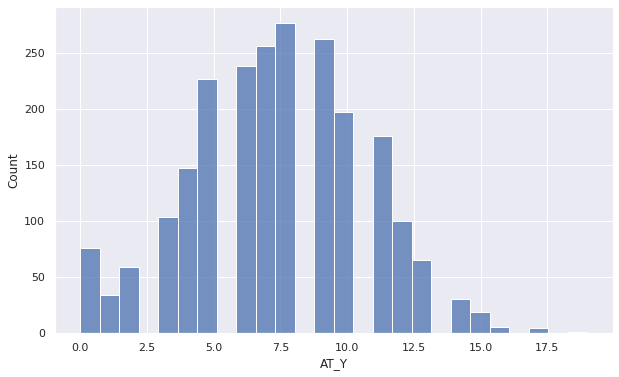

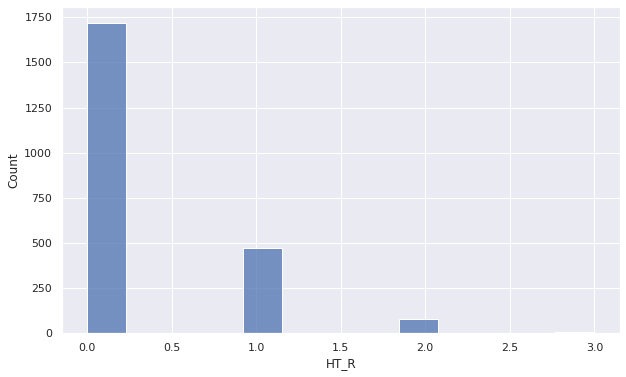

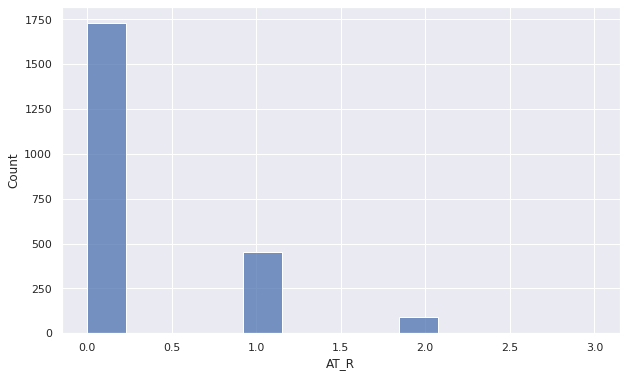

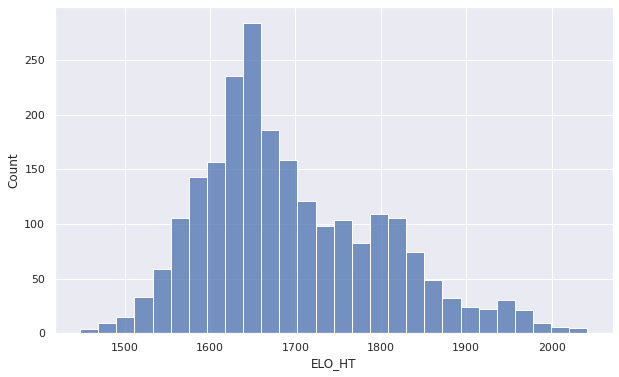

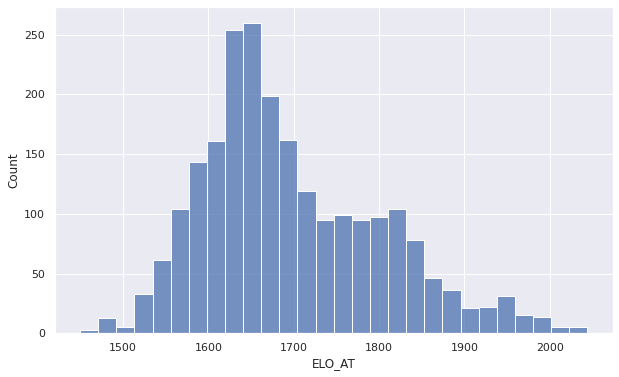

In [ ]:
# Vamos a ver las distribuciones de nuestras variables.

sns.set(rc={'figure.figsize':(10, 6)})
for col in df.columns[4:]:
    sns.histplot(df[col])
    plt.show()

In [ ]:
# Podemos observar que tenemos algunas variables que presentan distribuciones normales y otras que tienen unas 
# distribuciones sesgadas. Algunas de las variables presentan distribuciones exponenciales

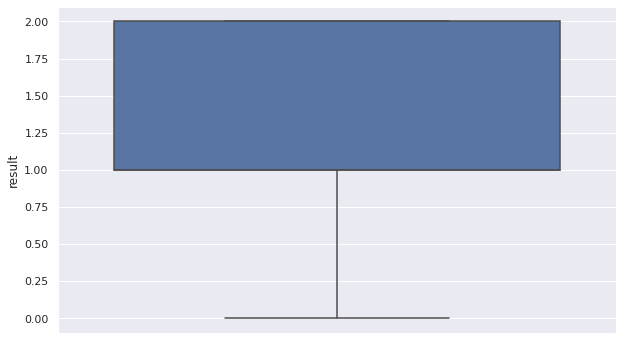

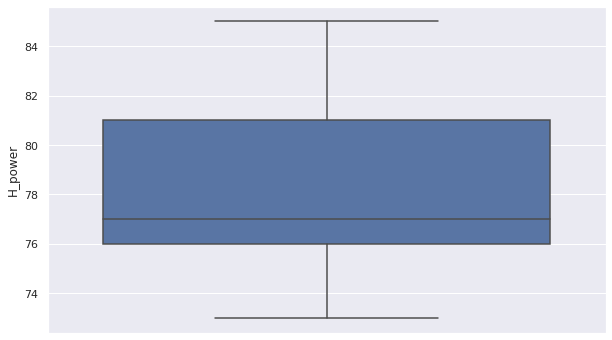

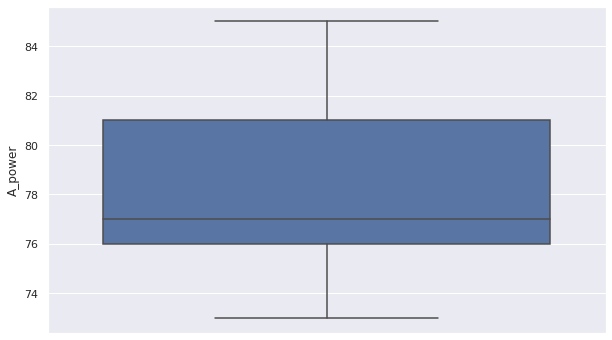

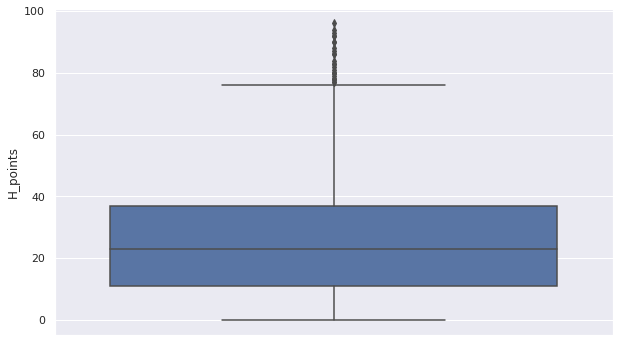

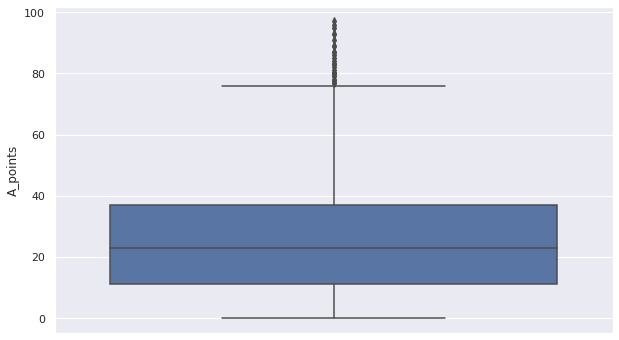

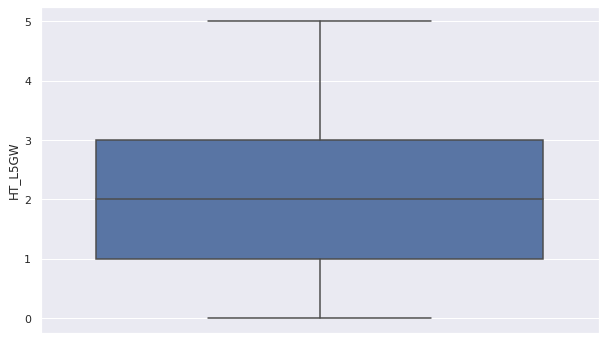

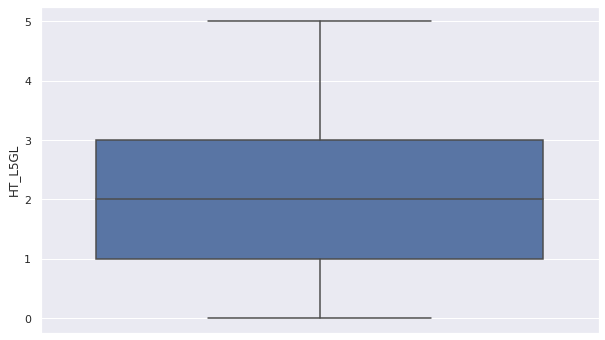

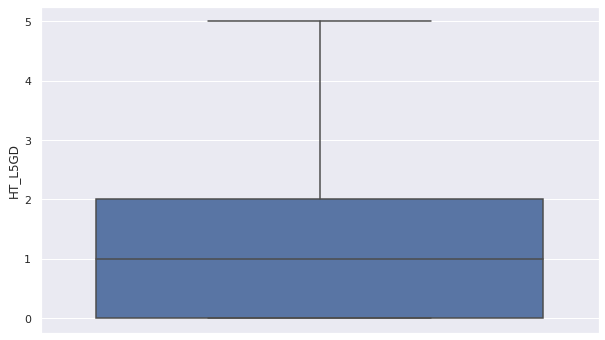

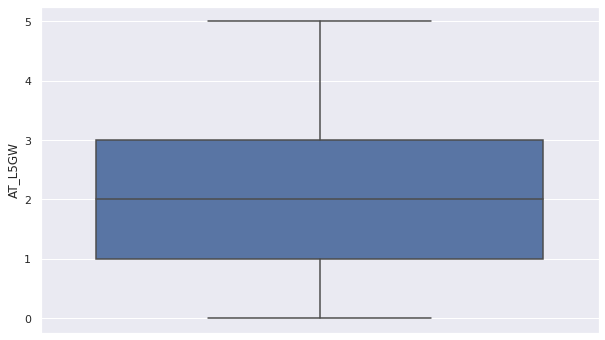

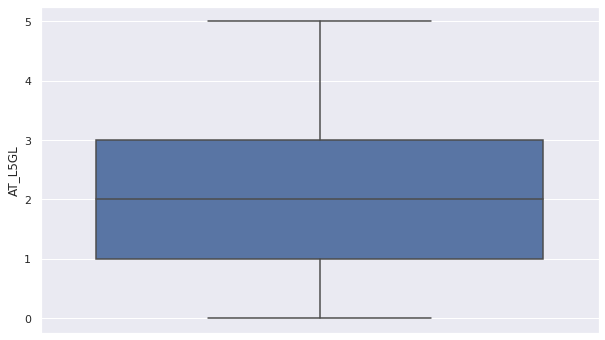

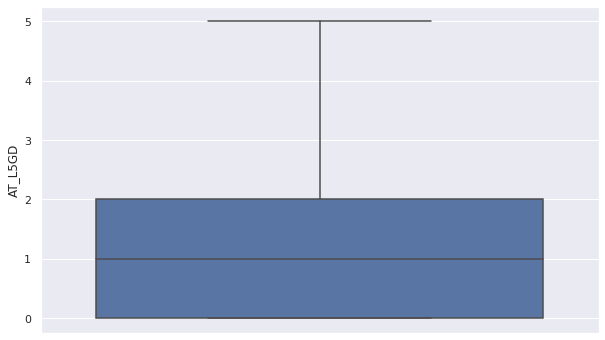

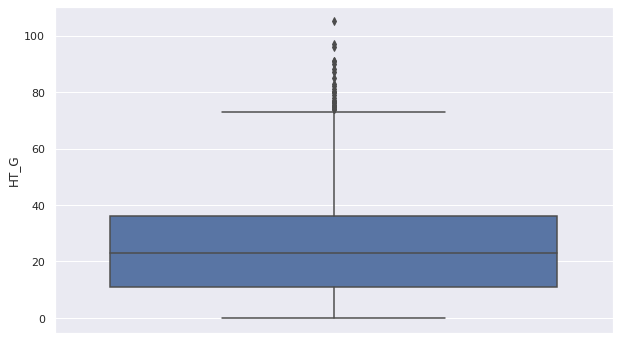

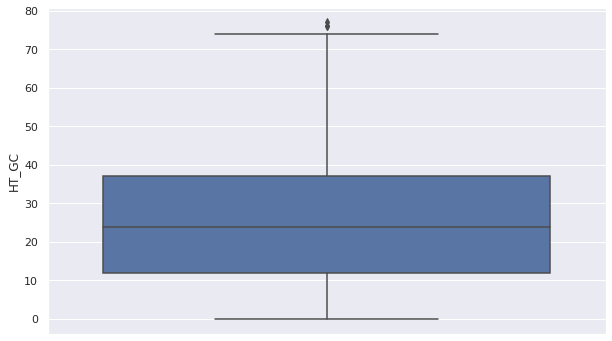

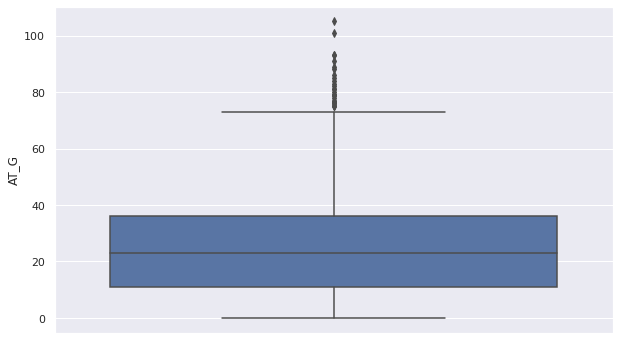

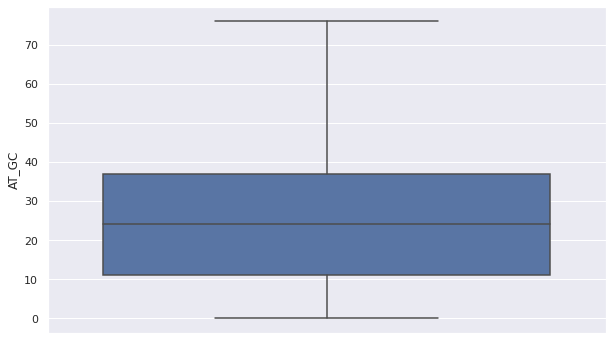

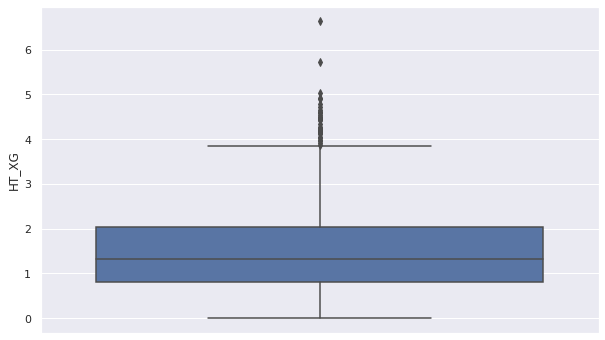

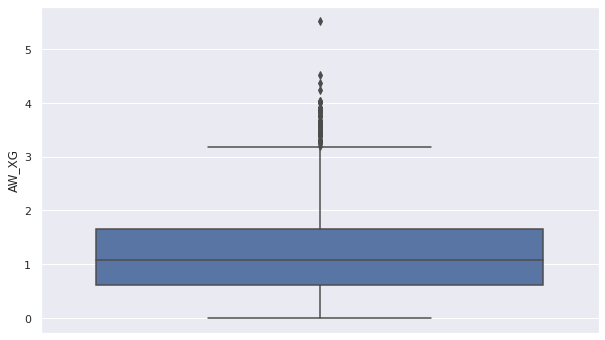

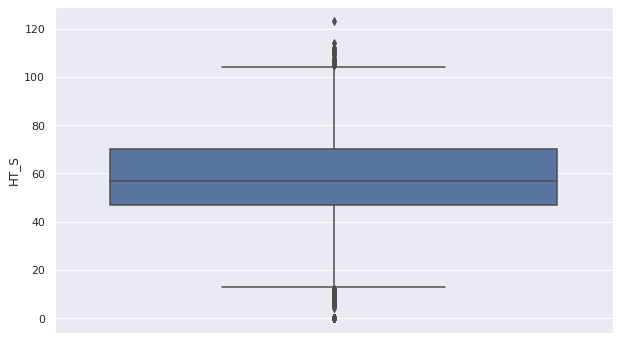

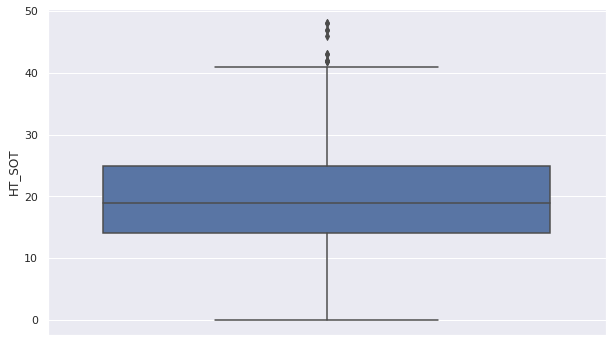

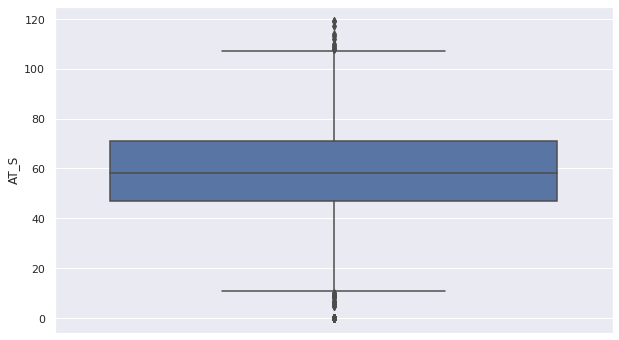

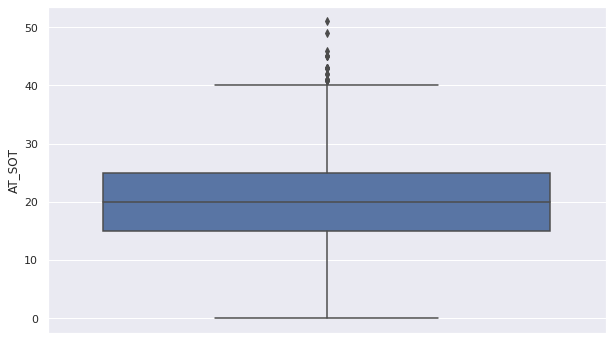

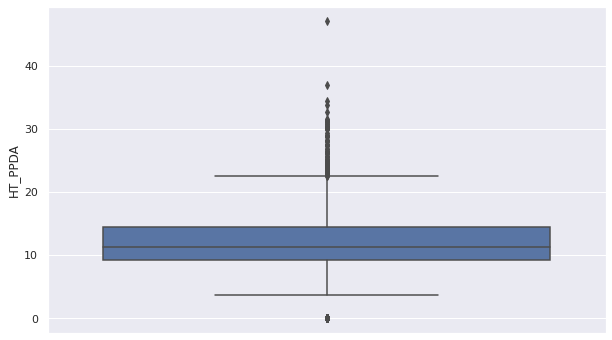

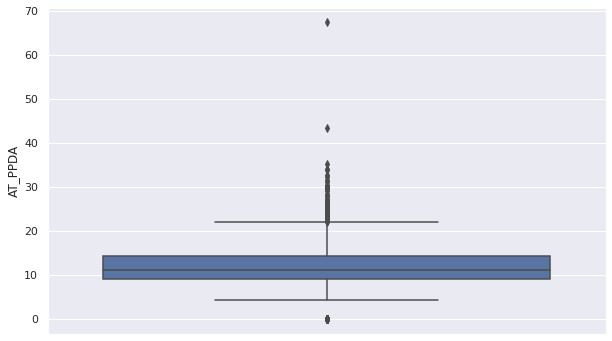

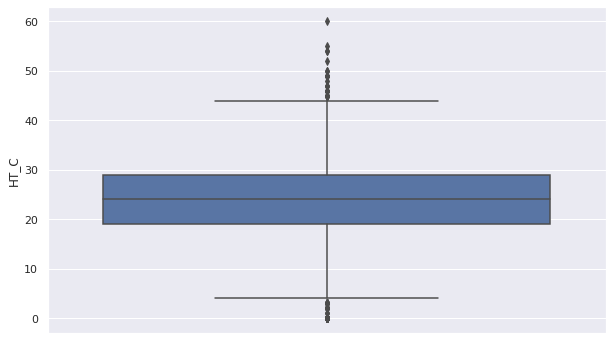

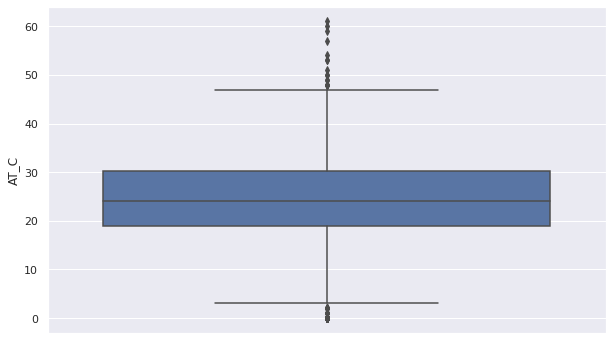

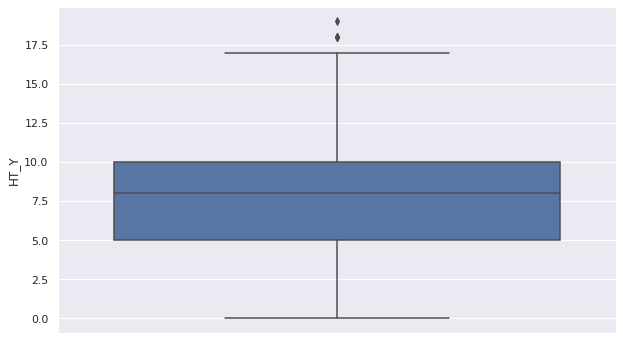

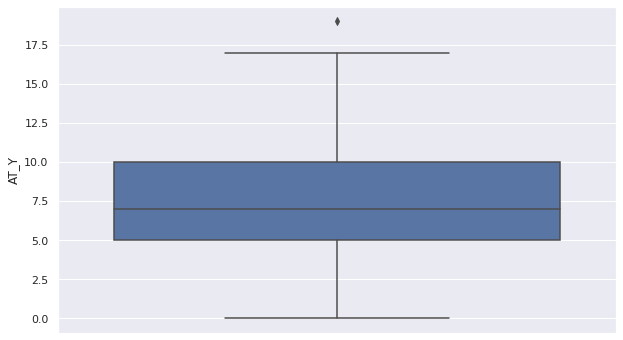

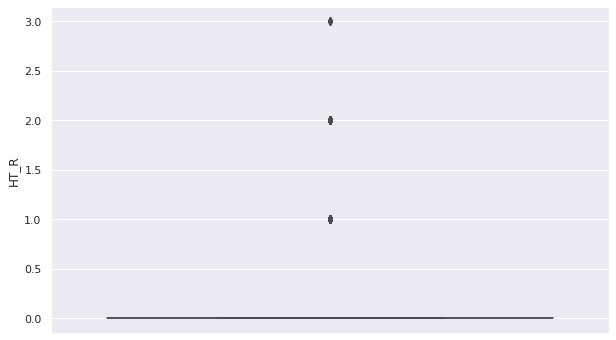

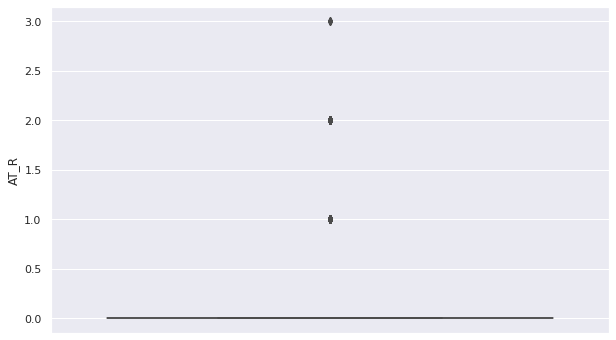

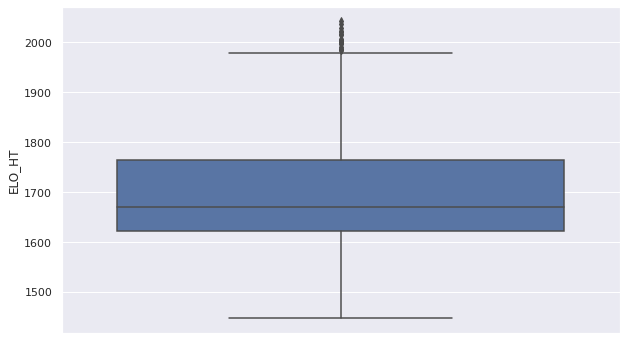

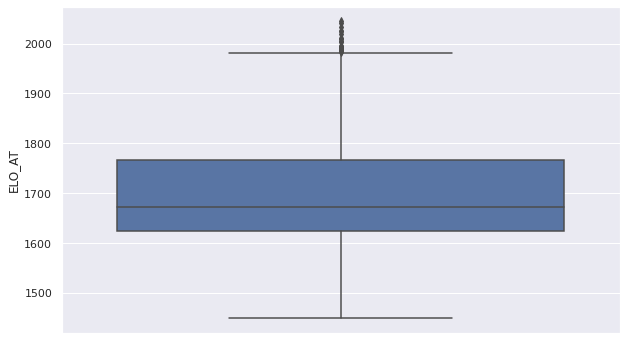

In [ ]:
# Vamos a ver las outliers de nuestras variables.

sns.set(rc={'figure.figsize':(10, 6)})
for col in df.columns[4:]:
    sns.boxplot(y=df[col])
    plt.show()

In [ ]:
# Tenemos muchos outliers, pero es normal ya que vamos a tener equipos que van a entrar dentro de nuestros quantiles y
# por otro lado, tendremos que equipos que se saldran, ya sea porque estan haciendo las cosas bien o mal. Por ejemplo,
# en el caso de los puntos ganados, tenemos varios puntos fuera del rango esos puntos corresponden a los equipos con
# mejor puntaje en el campeonato y no tiene sentido eliminarlos.

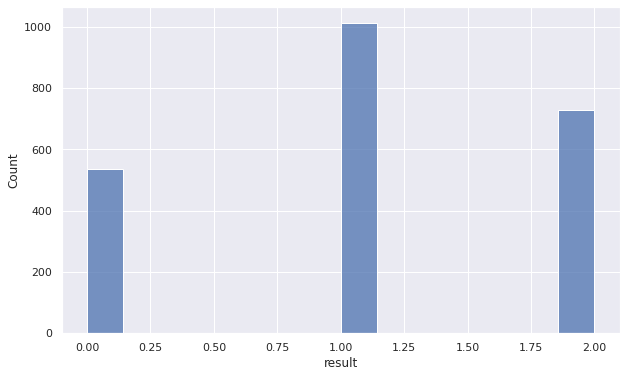

In [ ]:
# Partidos ganados, empatados y perdidos.

sns.set(rc={'figure.figsize':(10, 6)})
sns.histplot(df.iloc[:, 4]);

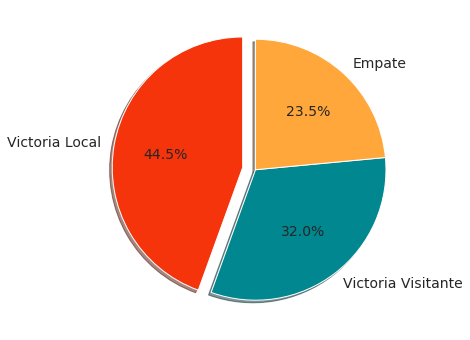

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
plt.pie([df[df['result']==1].count()['result'] / len(df) * 100, 
         df[df['result']==2].count()['result'] / len(df) * 100, 
         df[df['result']==0].count()['result'] / len(df) * 100],
         labels=['Victoria Local', 'Victoria Visitante', 'Empate'],
         shadow=True,
         autopct='%1.1f%%',
         startangle=90,
         explode=[0.1, 0, 0],
         colors=['#F5340B','#018790','#FFA73B'],
         textprops={'fontsize': 14}
       );
plt.savefig(r"victories%.png", transparent=True)

In [ ]:
# Vemos que como es logico los equipos locales ganan mas partidos que los equipos visitantes. La localia es un factor 
# que influye en el futbol
df[df['result']==1].count()['result'], df[df['result']==2].count()['result'], df[df['result']==0].count()['result']

(1014, 730, 536)

In [ ]:
team_stats

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,235,2020,2021-05-23 19:00:00,a,0,0.357583,9,2,0,39.7273,10,3,0.0,0,L
25356,16134,175,2020,2021-05-23 19:00:00,h,0,1.460500,19,5,6,7.5600,13,9,1.0,0,L
25357,16134,181,2020,2021-05-23 19:00:00,a,1,1.380290,10,2,3,14.7200,10,3,0.0,0,W
25358,16135,225,2020,2021-05-23 19:00:00,h,1,0.323960,6,2,1,15.1000,17,2,1.0,0,D


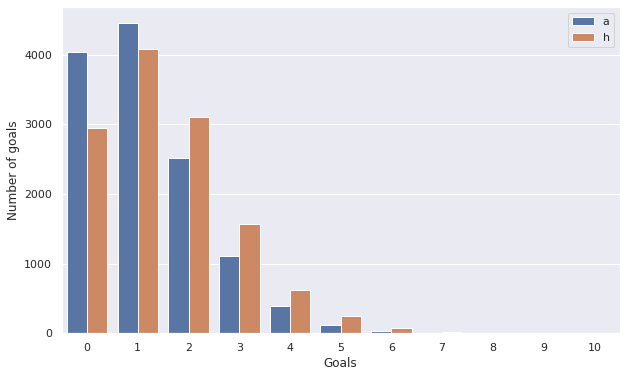

In [ ]:
# Goles anotados por equipos locales y visitantes

goals_h_a = team_stats.groupby(['goals', 'location'], as_index=False).count()
ax = sns.barplot(x=goals_h_a['goals'], y=goals_h_a['gameID'], hue=goals_h_a['location'])
ax.set_xlabel('Goals')
ax.set_ylabel('Number of goals')
ax.legend(loc='upper right')

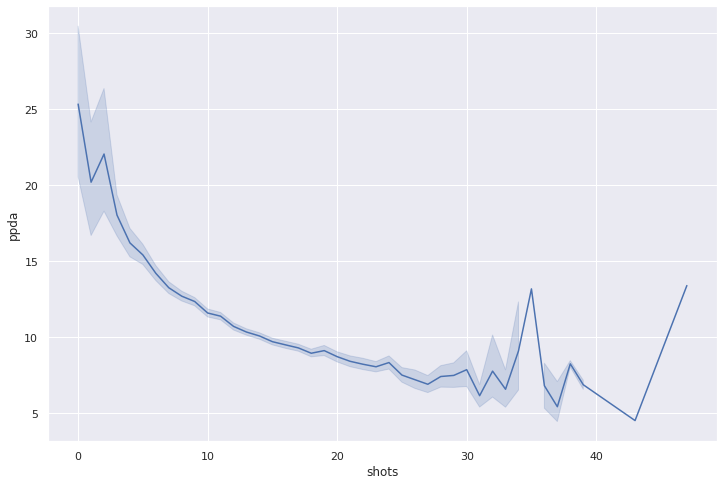

In [ ]:
# Vamos a analizar el PPDA (Passes Per Defensive Action). Se define como:
# Number of Passes made by Attacking Team (opponent) / Number of Defensive Actions
# Minetras menor sea este numero, menos pases se le dejan hacer al equipo rival antes de una accion defensiva, lo que se 
# traduce a una mayor posecion de nuestro equipo y por ende, mayores oportunidades de hacer tiros al arco.

# Vamos a graficar el ppda vs los goles
sns.set(rc={'figure.figsize':(12, 8)})
sns.lineplot(data=team_stats, x='shots', y='ppda');

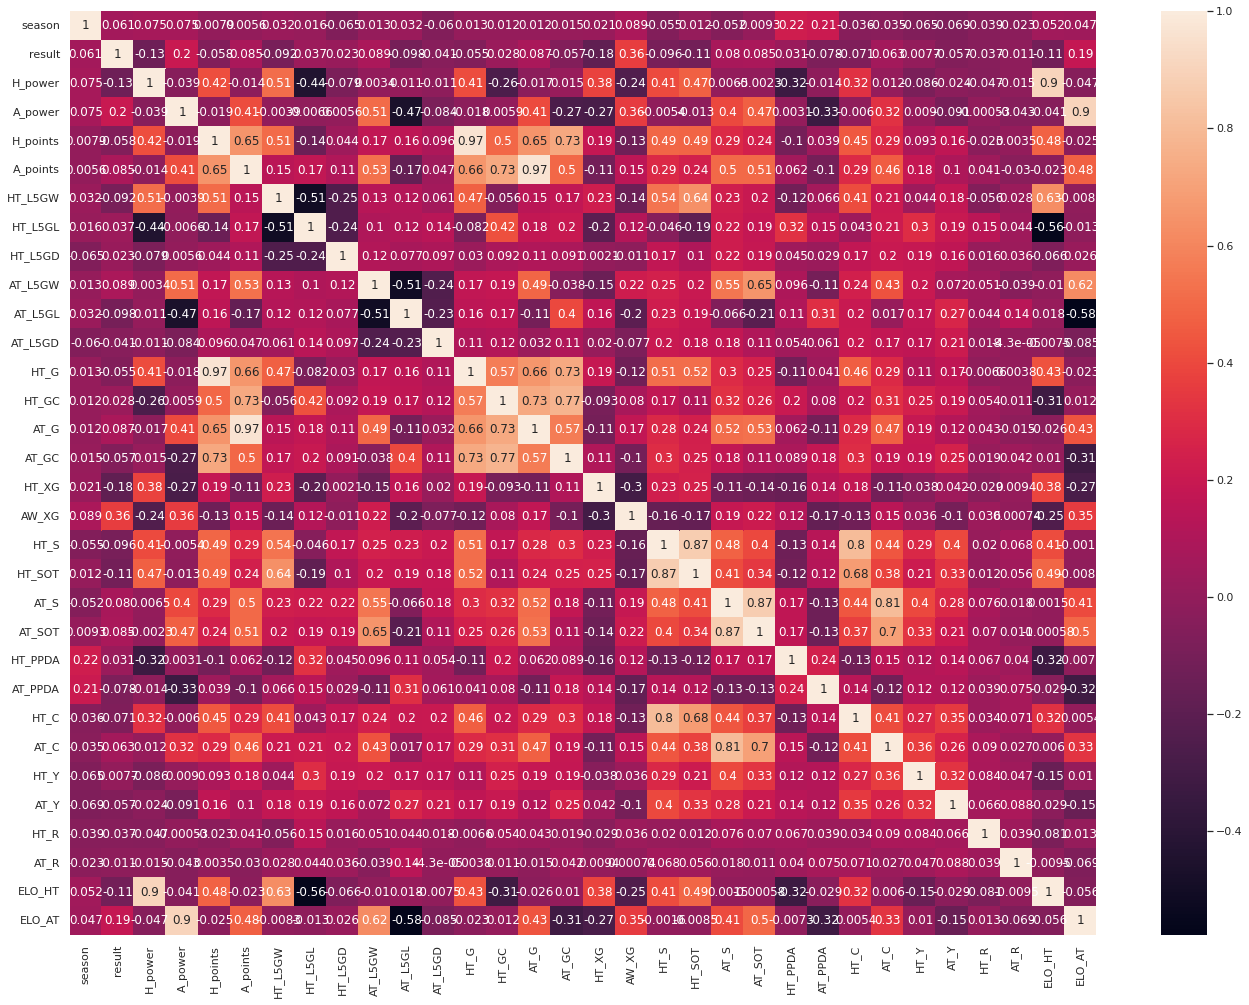

In [ ]:
# Vamos a ver nuestra matriz de correlacion

sns.set(rc={'figure.figsize':(23, 17)})
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Vemos que existe una correlacion muy alta entre los tiros al arco y los tiros, esto es logico ya que una esta compuesta
# por la otra. Vamos a mantener los tiros al arco ya que son mas relevantes. 

# Vamos a dropear tambien las columnas de H y A power ya que estan referidas al ranking del fifa y es mas real el ELO
# ranking

df.drop(columns=['HT_S', 'AT_S', 'H_power', 'A_power'], axis=1, inplace=True)

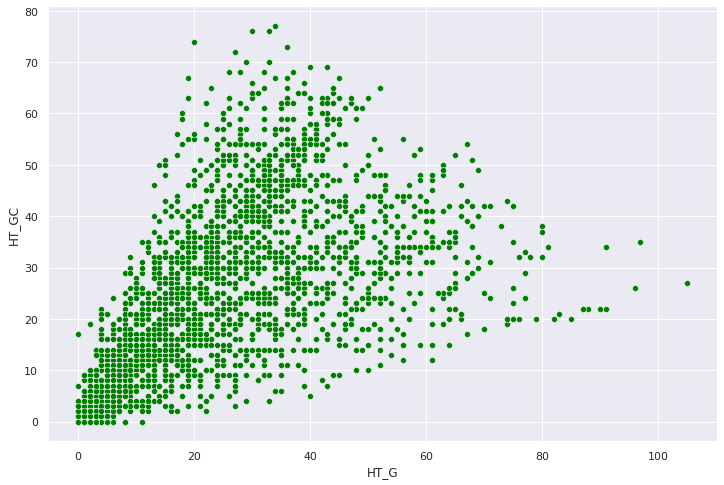

In [ ]:
# Si realizamos la grafica entre los goles realizados y los goles concedidos por los equipos locales, vamos una tendencia
# creciente. Mientras mas goles se hacen, mas goles se conceden. Es importante notar que tenemos casos muy particulares donde
# se realizan muchos goles y se anota poco y viceversa. Estos son los equipos que ganan campeonatos o los pierden.

sns.set(rc={'figure.figsize':(12, 8)})
sns.scatterplot(x=df['HT_G'], y=df['HT_GC'], color='green');

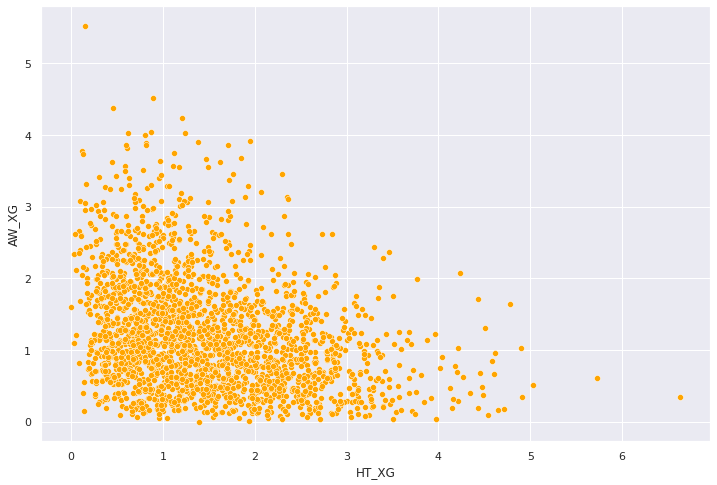

In [ ]:
# Vamos a ver los goles esperados para el equipo local vs el visitante. La mayoria de los goles de visitante se 
# cocnentran entre 0 y 2 mientras que el de los locales entre 0 y 2.5.
sns.scatterplot(x=df['HT_XG'], y=df['AW_XG'], color='orange');

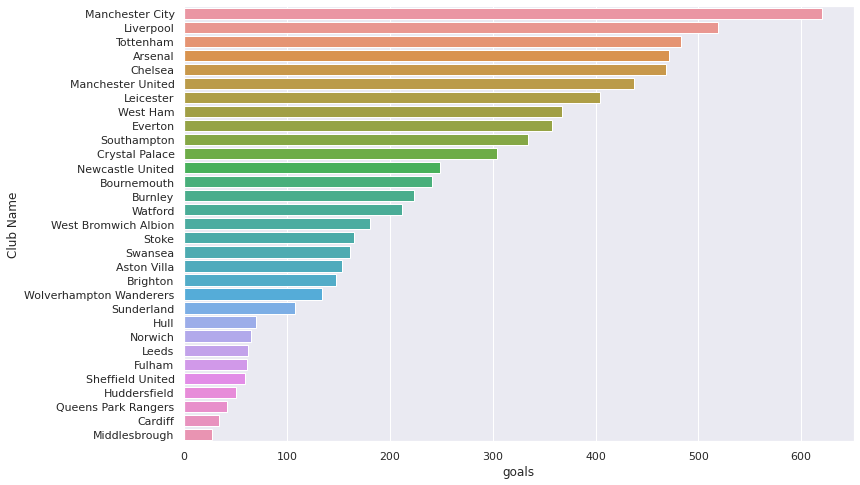

In [ ]:
# Vamos a ver los goles realizados por equipo

sns.set(rc={'figure.figsize':(12, 8)})
goals_club = pl.groupby('club_name').sum().sort_values('goals', ascending=False)
sns.barplot(x=goals_club['goals'], y=goals_club.index)
plt.xticks(rotation=0)
plt.ylabel('Club Name');

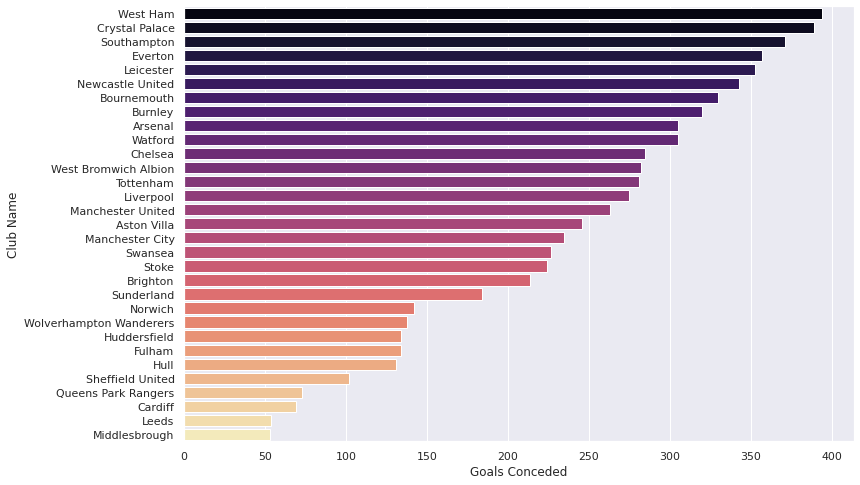

In [ ]:
# Vamos a ver los goles recibidos por equipo

club = pl.club_name.unique()
cg = []
for i in club:
    cgid = pl[pl['club_name'] == i]['gameid']
    cg.append(pl[(pl['club_name'] != i) & (pl['gameid'].isin(cgid))]['goals'].sum())

goals_c = pd.DataFrame({'club': club, 'gc': cg}).sort_values('gc', ascending=False)
sns.set(rc={'figure.figsize':(12, 8)})
sns.barplot(x=goals_c['gc'], y=goals_c['club'], palette='magma')
plt.xticks(rotation=0)
plt.ylabel('Club Name')
plt.xlabel('Goals Conceded');

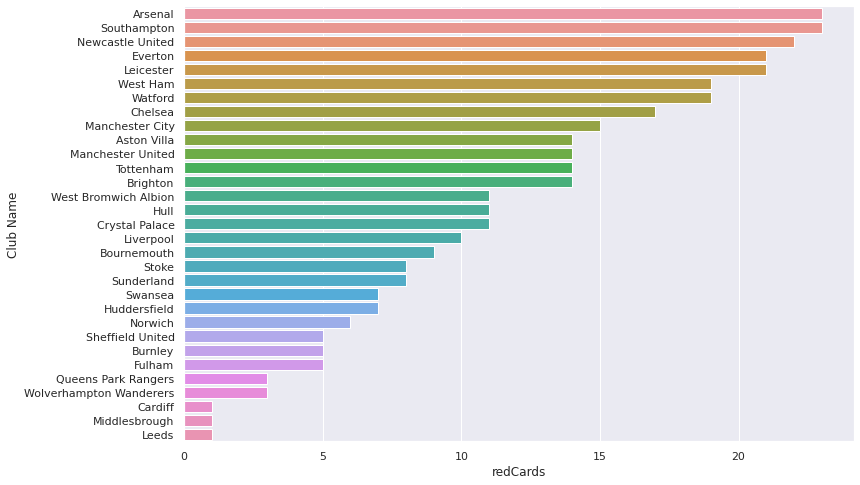

In [ ]:
# Otro parametro que influye mucho en el resultado es tener uno o varios jugadores expulsados en el mismo partido. 

sns.set(rc={'figure.figsize':(12, 8)})
goals_club = pl.groupby('club_name').sum().sort_values('redCards', ascending=False)
sns.barplot(x=goals_club['redCards'], y=goals_club.index)
plt.xticks(rotation=0)
plt.ylabel('Club Name');

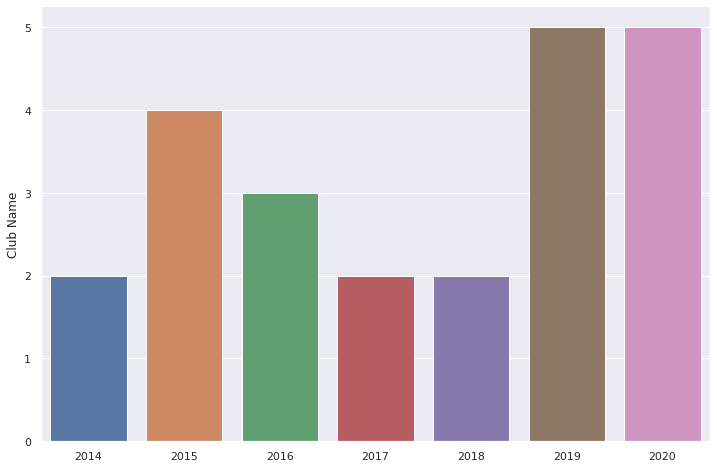

In [ ]:
# Vemos que Arsenal y Southampton tienen los mayores numeros de expulsados. Esto seguramente inpacta en los resultaods.
# Vamos a ver en que temporadas sucedio esto para el Arsenal

sns.set(rc={'figure.figsize':(12, 8)})
arsenal = pl[pl['club_name'] == 'Arsenal']
arsenal_rc = arsenal.groupby('season').sum().sort_values('redCards', ascending=False)
sns.barplot(y=arsenal_rc['redCards'], x=arsenal_rc.index.values)
plt.xticks(rotation=0)
plt.ylabel('Club Name');

In [ ]:
pl[(pl['club_name'] == 'Arsenal') & (pl['season'] == 2019) & (pl['redCards'] > 0)]

,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,club_name,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,league,gameid
3918,2019,2019-09-22 15:30:00,h,3,2.532090,21,6,12,9.1000,13,9,5.0,1,W,Arsenal,3,2,0.5722,0.2195,0.2083,Premier League,11702
4233,2019,2020-01-11 12:30:00,a,1,1.439240,7,4,8,5.6875,22,4,3.0,1,D,Arsenal,1,1,0.0317,0.1698,0.7985,Premier League,11859
4277,2019,2020-01-21 20:15:00,a,2,0.568077,2,2,2,21.6667,6,5,1.0,1,D,Arsenal,2,2,0.9524,0.0418,0.0058,Premier League,11881
4349,2019,2020-06-17 19:15:00,a,0,0.496759,3,0,1,26.5333,7,2,1.0,1,L,Arsenal,3,0,0.8987,0.0832,0.0181,Premier League,11917
4460,2019,2020-07-07 19:15:00,h,1,1.290230,11,7,8,17.1111,10,10,1.0,1,D,Arsenal,1,1,0.4342,0.3080,0.2578,Premier League,11973


In [ ]:
# Podemos ver que de los 5 partidos jugados en la temporada 2019 solo se gano un partido y se perdieron 9 puntos de
# 15 posibles!, es decir, un 60%!

Es importante mencionar que los Outliers es algo que debemos tratar ya que van a afectar a nuestro modelo. Para ello usaremos el modelo no supervisado de Local Outlier Factor para poder detectar esos datos y sacarlos de nuestro estudio. 

Esto lo realizaremos en el estudio del modelo de machine learning

## ELO Rating (Time Series)

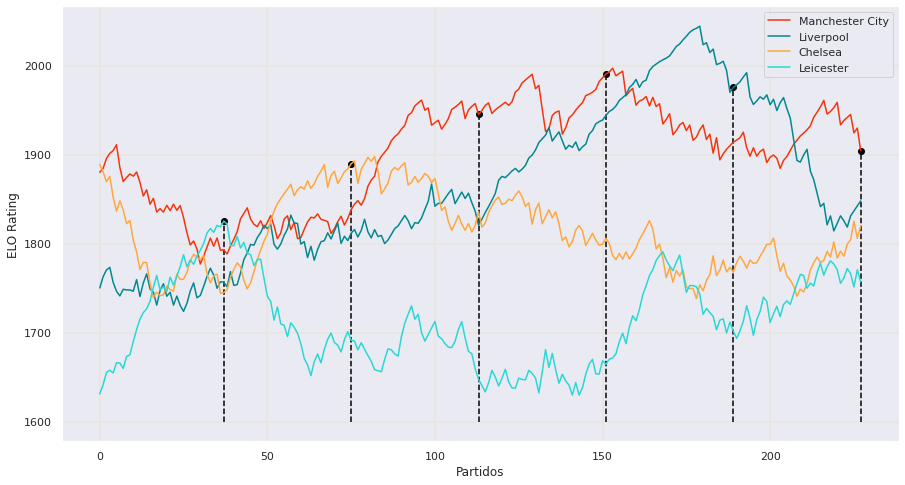

In [ ]:
plt.figure(figsize=(15, 8))

clubs = ['Manchester City', 'Liverpool', 'Chelsea', 'Leicester']
color = ['#F5340B','#018790','#FFA73B', '#28D8D4']
matches = range(0, 228, 1)
elo_time = pd.DataFrame(0, columns=clubs, index=range(0, 228))
match_date = pd.DataFrame(0, columns=clubs, index=range(0, 228))

elo_variation = []
date = []
count = 0
for i in clubs:
    for j in range(len(df)):
        if df.loc[j, 'HT'] == i:
            elo_variation.append(df.loc[j, 'ELO_HT'])
            date.append(df.loc[j, 'date'])
        elif df.loc[j, 'AT'] == i:
            elo_variation.append(df.loc[j, 'ELO_AT'])
            date.append(df.loc[j, 'date'])
            
    ax = sns.lineplot(x=matches, y=elo_variation, color=color[count])
    ax.grid(color='#E9E6E1', linestyle='-', linewidth=2)
    elo_time[i] = elo_variation
    match_date[i] = date
    elo_variation = []
    date = []
    count += 1
    
for i in range(0, 7):
    plt.vlines(x=i*38-1, ymin=1600, 
               ymax=max(df.loc[380*i-10:380*i-1, 'ELO_HT'].max(), df.loc[380*i-10:380*i-1, 'ELO_AT'].max()), 
               linestyles='--',
               color='black',
              )
    plt.scatter(x=i*38-1, y=max(df.loc[380*i-10:380*i-1, 'ELO_HT'].max(), df.loc[380*i-10:380*i-1, 'ELO_AT'].max()),
               marker='o', color='black')

    
ax.set_xlabel('Partidos')
ax.set_ylabel('ELO Rating')
ax.legend(clubs)
plt.savefig(r"premier_league.png", transparent=True, facecolor='#E9E6E1', edgecolor='#E9E6E1')
plt.show();

Podemos observar un patro, el equipo que gana la liga es el equipo con mayor ELO Rating del momento.

In [ ]:
elo_time

,Manchester City,Liverpool,Chelsea,Manchester United,Leicester
0,1880.000000,1750.000000,1889.000000,1808.000000,1631.000000
1,1884.373377,1762.687226,1880.566538,1819.605895,1641.345315
2,1895.500116,1770.332926,1869.439799,1825.970528,1655.093666
3,1901.260931,1773.247943,1875.379701,1816.880841,1657.653451
4,1904.390390,1756.369354,1852.100624,1796.282271,1654.559643
...,...,...,...,...,...
223,1941.593762,1818.451097,1799.250647,1858.425876,1771.894895
224,1945.000890,1830.989803,1804.191980,1845.887170,1766.177435
225,1924.234017,1836.566450,1824.958852,1851.676641,1751.233117
226,1929.680648,1842.154763,1805.798570,1832.457052,1770.452706


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Vamos a observar el test para cada parametro
for i in elo_time.columns:
    print(f'Adfuller test para {i}')
    print(adfuller(elo_time[i])[1])
    print('------' * 8)

Adfuller test para Manchester City
0.6003339894817005
------------------------------------------------
Adfuller test para Liverpool
0.6112735725441563
------------------------------------------------
Adfuller test para Chelsea
0.1756915125209726
------------------------------------------------
Adfuller test para Manchester United
0.1533529242372066
------------------------------------------------
Adfuller test para Leicester
0.28690052147886735
------------------------------------------------


Como vemos no cumplimos con test y era algo que ya esperabamos porque en las graficas se observaba una no estacionalidad
en nuestras variables. Vamos a convertirlas en estacionarias a partir de una funcion.

In [ ]:
# Vamos a restar el valor altual menos el final

elo_diff = elo_time.diff().dropna()
for i in elo_diff.columns:
    print(f'Adfuller test para {i}')
    print(adfuller(elo_diff[i])[1])
    print('------' * 8)

Adfuller test para Manchester City
1.7726564937355e-08
------------------------------------------------
Adfuller test para Liverpool
6.258248578557208e-17
------------------------------------------------
Adfuller test para Chelsea
5.688516033273795e-29
------------------------------------------------
Adfuller test para Manchester United
8.807624212163889e-14
------------------------------------------------
Adfuller test para Leicester
3.837696648215951e-27
------------------------------------------------


In [ ]:
# Vemos que el p-value es menor 0.01 en todos los casos, por lo que podemos rechazar la hipotesis nula y aceptar la
# hipotesis alternativa, es decir, nuestras series de tiempo SI son estacionarias.

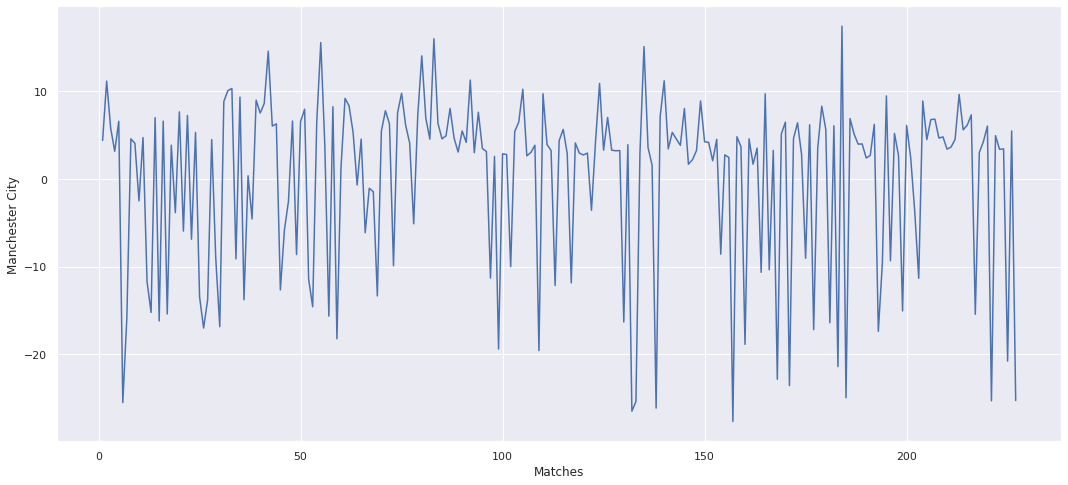

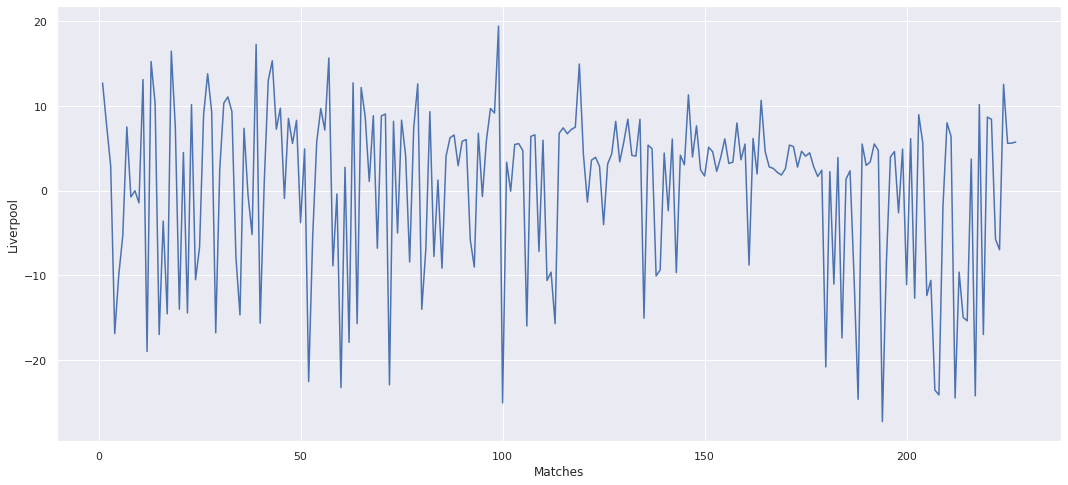

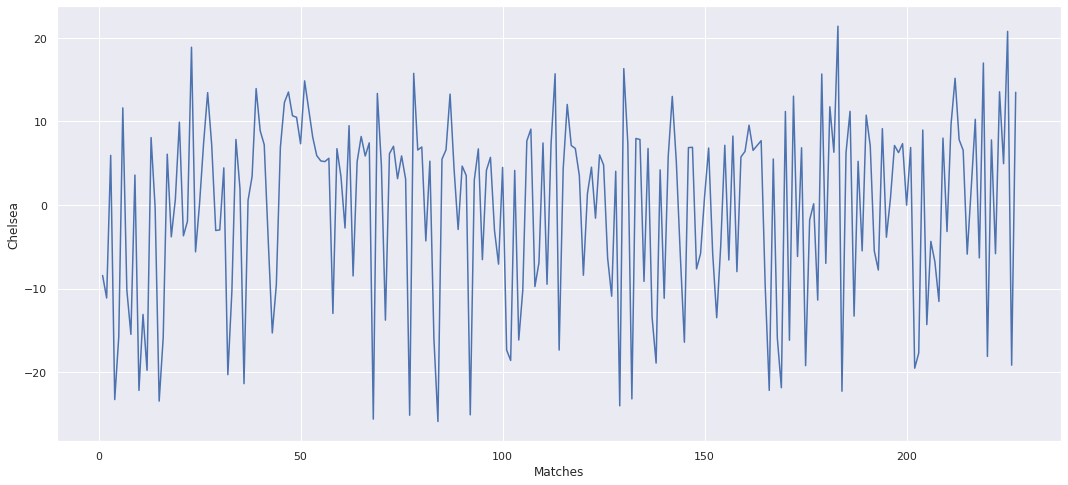

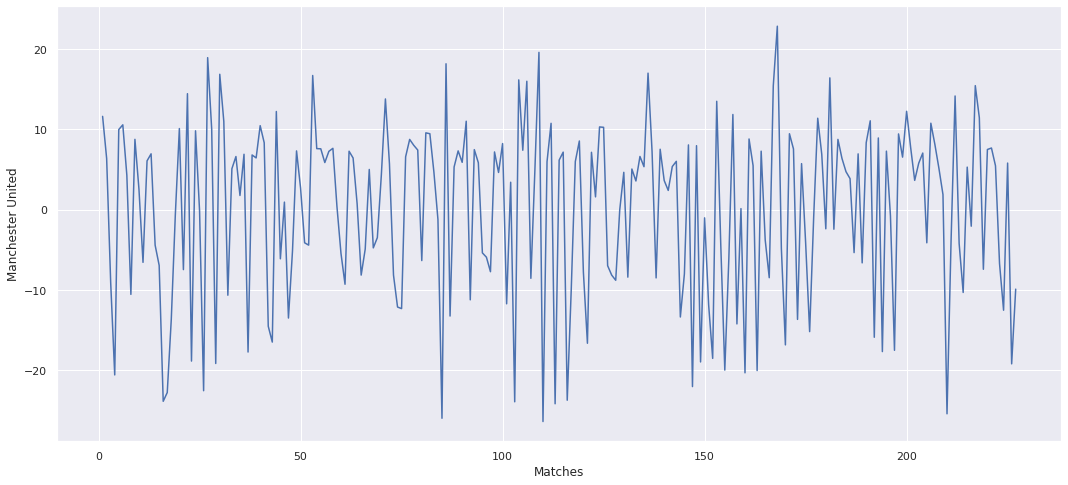

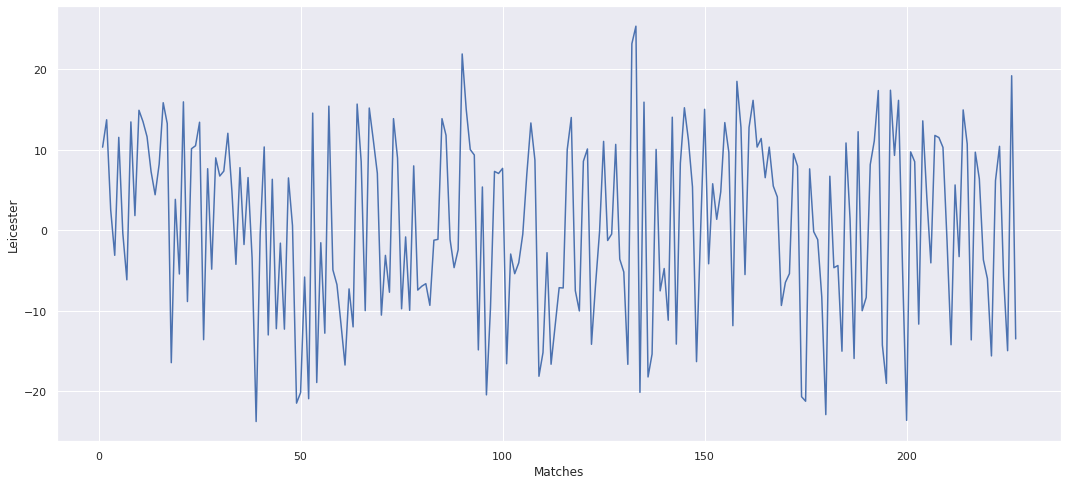

In [ ]:
clubs = ['Manchester City', 'Liverpool', 'Chelsea', 'Manchester United', 'Leicester']
matches = range(1, 228, 1)

for i in clubs:
    plt.figure(figsize=(18, 8))
    ax = sns.lineplot(x=matches, y=elo_diff[i])
    ax.set_xlabel('Matches')
    plt.show()

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as mse

In [ ]:
match_date

,Manchester City,Liverpool,Chelsea,Manchester United,Leicester
0,2015-08-10 23:00:00,2015-08-09 19:00:00,2015-08-08 20:30:00,2015-08-08 15:45:00,2015-08-08 18:00:00
1,2015-08-16 19:00:00,2015-08-17 23:00:00,2015-08-16 19:00:00,2015-08-14 22:45:00,2015-08-15 18:00:00
2,2015-08-23 19:00:00,2015-08-24 23:00:00,2015-08-23 16:30:00,2015-08-22 15:45:00,2015-08-22 18:00:00
3,2015-08-29 18:00:00,2015-08-29 18:00:00,2015-08-29 18:00:00,2015-08-30 19:00:00,2015-08-29 18:00:00
4,2015-09-12 18:00:00,2015-09-12 20:30:00,2015-09-12 15:45:00,2015-09-12 20:30:00,2015-09-13 19:00:00
...,...,...,...,...,...
223,2021-05-01 11:30:00,2021-05-13 19:15:00,2021-05-01 16:30:00,2021-05-13 19:15:00,2021-04-30 19:00:00
224,2021-05-08 16:30:00,2021-05-08 19:15:00,2021-05-08 16:30:00,2021-05-09 13:05:00,2021-05-07 19:00:00
225,2021-05-14 19:00:00,2021-05-16 15:30:00,2021-05-12 19:15:00,2021-05-11 17:00:00,2021-05-11 17:00:00
226,2021-05-18 18:00:00,2021-05-19 19:15:00,2021-05-18 19:15:00,2021-05-18 17:00:00,2021-05-18 19:15:00


In [ ]:
time_train = elo_diff.loc[elo_diff.index <= 200, 'Liverpool'].copy()
time_test = elo_diff.loc[elo_diff.index > 200, 'Liverpool'].copy()

date_train = match_date.loc[match_date.index <= 200, 'Liverpool'].copy()
date_train.rename('date', inplace=True)
date_test = match_date.loc[match_date.index > 200, 'Liverpool'].copy()
date_test.rename('date', inplace=True)


train = pd.concat([date_train, time_train], axis=1, names=['ds', 'y'])
test = pd.concat([date_test, time_test], axis=1)

train = train.reset_index(drop=True).rename(columns={'date': 'ds', 'Liverpool': 'y'})
test = test.reset_index(drop=True).rename(columns={'date': 'ds', 'Liverpool': 'y'})

train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
# No tenemos una frecuencia precisa para la ocurrencia de los partidos.

In [ ]:
model = Prophet()
model.fit(train)
predic = model.predict(test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


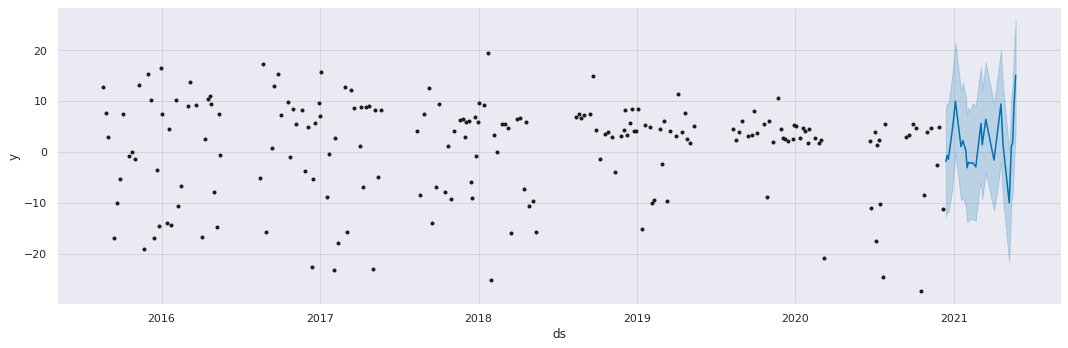

In [ ]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=model.plot(predic, ax=ax)

Se trato de predecir el comportamiento del ELO rating, pero debido a que las mediciones de tiempo no son constantes (ya que los partidos cada cierto tiempo de forma precisa. Aveces pasan 2 o 3 semanas antes de volver a jugar por las fechas FIFA), el modelo no se comporta de manera adecuada y nos da un forecasting de fechas que no son las adecuadas.

In [ ]:
def diff_inv(series_diff, first_value):
    series_inverted = np.r_[first_value, series_diff].cumsum().astype('float64')
    return series_inverted